<a href="https://colab.research.google.com/github/Athugodage/for_inca/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Report



I have collected 1372 reviews for 10 cryptocurrency-related applications in Google Play.

These reviews were classified as positive or negative using Transformers fine-tuned distilbert-base-uncased model.

The language of the review was identified with Fasttext default model.

In [3]:
import pandas as pd

df = pd.read_csv('final_data.csv')

df

,App name,Username,Timestamp,App review text,Sentiment score,country (language),Marketplace
0,"Crypto.com - Buy BTC, ETH",BKO,2022-06-18 18:10:03,I've had a great experience with this app. At ...,0.995971,en,Google Play Store
1,"Crypto.com - Buy BTC, ETH",Ryan Jessup,2022-05-31 18:12:34,Opened my ap this morning and it just keeps te...,0.939697,en,Google Play Store
2,"Crypto.com - Buy BTC, ETH",Blake Kent,2021-06-17 07:49:31,I'm not quite sure why there are SO MANY bad r...,0.996500,en,Google Play Store
3,"Crypto.com - Buy BTC, ETH",Tooth Picks,2021-11-09 11:52:13,"It has its problems, mainly on the fact that i...",-0.991211,en,Google Play Store
4,"Crypto.com - Buy BTC, ETH",Adam Cooper,2021-03-26 11:28:52,I personally have had a great experience so fa...,0.996602,en,Google Play Store
...,...,...,...,...,...,...,...
1417,SoBit: Bitcoin Wallet - BTC,Bush Vital,2022-08-03 12:37:05,"light, fast and seems to be reliable",0.958312,en,Google Play Store
1418,SoBit: Bitcoin Wallet - BTC,Webster Kuldip,2022-08-03 12:36:44,How can I delete the account and data for this...,-0.996736,en,Google Play Store
1419,SoBit: Bitcoin Wallet - BTC,Boyer Canal,2022-08-03 08:05:02,"Enjoyed and can play in your cell phone,, Chan...",0.995572,en,Google Play Store
1420,SoBit: Bitcoin Wallet - BTC,Depuydt Hagert,2022-08-21 05:02:26,It's worth using. Not bad,-0.711233,en,Google Play Store


Each app has at least 100 reviews in this dataset. Numbers vary from 100 to 200 because the data was collected in two steps. 
Below is a graph with all apps in the dataset and their number of reviews.

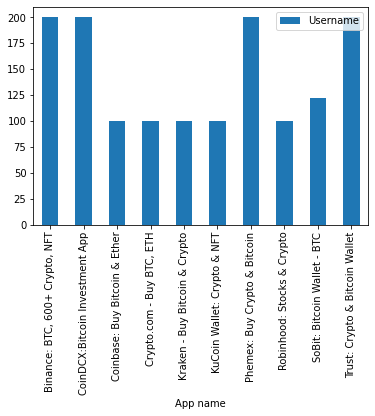

In [7]:
df.groupby(['App name']).agg({'Username': 'count'}).plot.bar()

The table below shows that most comments were published in 2022

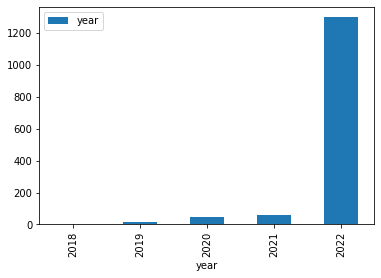

In [65]:
df['year'] = df['Timestamp'].apply(lambda x: pd.Timestamp(x).year)
df.groupby('year').agg({'year': 'count'}).plot.bar()

According to the chart below, most comments were published from 9am to 2pm, which is odd.

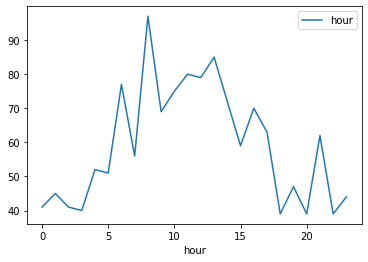

In [67]:
df['hour'] = df['Timestamp'].apply(lambda x: pd.Timestamp(x).hour)
df.groupby('hour').agg({'hour': 'count'}).plot()

In our dataset Sentiment Score shows just the model score. If the number is negative (less than 0), then the comment is negative too and vice versa. That is made so because the project task was ambigious about 'Sentiment score'. 

When filling in our data I multiplied the score by -1 to get a negative number if the label was negative.

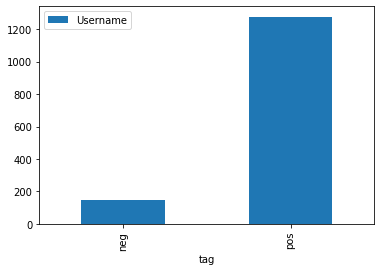

In [18]:
def zero(x):
    if float(x) > 0:
        return 'pos'
    elif float(x) < 0:
        return 'neg'
    else:
        return 'neut'

df['tag'] = df['Sentiment score'].apply(zero)
stats = df.groupby(['tag']).agg({'Username': 'count'})
stats.plot.bar()


In [20]:
stats

,Username
tag,
neg,146
pos,1276


The majority of comments are positive (1276). Our dataset contains only 146 negative comments.

In [10]:
df.groupby(['country (language)']).agg({'Username': 'count'})

,Username
country (language),
bg,1
en,1419
ru,1
sv,1


As can be seen from the table above, the vast majority of comments are written in English. Only 3 reviews in other languages: Russian, Swedish and Bulgarian.

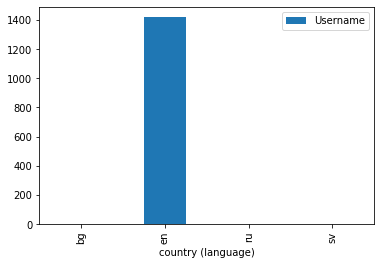

In [11]:
df.groupby(['country (language)']).agg({'Username': 'count'}).plot.bar()

Word 'love' occurs in 121 reviews.

In [94]:
df = df.drop(['hour', 'year', 'tag'], axis=1)

In [95]:
df[df['App review text'].str.contains('love ')]

,App name,Username,Timestamp,App review text,Sentiment score,country (language),Marketplace
0,"Crypto.com - Buy BTC, ETH",BKO,2022-06-18 18:10:03,I've had a great experience with this app. At ...,0.995971,en,Google Play Store
3,"Crypto.com - Buy BTC, ETH",Tooth Picks,2021-11-09 11:52:13,"It has its problems, mainly on the fact that i...",-0.991211,en,Google Play Store
7,"Crypto.com - Buy BTC, ETH",Christopher Fallucca,2022-08-23 13:13:55,Exceptional in every way. Just be sure to impo...,0.995712,en,Google Play Store
10,"Crypto.com - Buy BTC, ETH",Sorie Bangura,2022-08-19 19:33:53,I'm also having trouble with the 2FA. I can't ...,-0.995044,en,Google Play Store
12,"Crypto.com - Buy BTC, ETH",Shannon O'Hara,2022-07-25 03:19:30,I love this app. I started out with several an...,0.996585,en,Google Play Store
...,...,...,...,...,...,...,...
1336,"Binance: BTC, 600+ Crypto, NFT",GLITTER FART,2022-06-29 10:43:45,I love the app and what it has to offer. in my...,0.996634,en,Google Play Store
1354,"Binance: BTC, 600+ Crypto, NFT",Raka Canzhy,2022-06-29 06:05:26,The most usefull and helpfull platform that al...,0.995283,en,Google Play Store
1355,"Binance: BTC, 600+ Crypto, NFT",Isaac Annan,2022-08-21 20:14:49,Binance is the platform sooo ever ...i will ra...,0.995068,en,Google Play Store
1378,SoBit: Bitcoin Wallet - BTC,Guiao Bundren,2022-08-17 17:54:40,Best & amazing featureable Bitcoin/Bitcoin wal...,0.997858,en,Google Play Store


While the word 'hate' just twice.

In [96]:
df[df['App review text'].str.contains('hate ')]

,App name,Username,Timestamp,App review text,Sentiment score,country (language),Marketplace
269,Coinbase: Buy Bitcoin & Ether,Nobitsu The Bluemage,2022-03-28 20:29:59,"EDIT (3/28/2022) As of late, more coins/tokens...",-0.988293,en,Google Play Store
422,Robinhood: Stocks & Crypto,A Google user,2019-11-09 17:48:37,"I love this app, it got me into investing. It'...",0.995946,en,Google Play Store
